**Задачи:**
1. Как может владелец дома повысить прибыль с AirBnB?
2. в какой месяц профитнее всего сдавать жье на AirBnB?
3. Когда профитнее всего снимать жилье на AirBnB?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import dates
import datetime
%matplotlib inline


Я взял такой датасет [Seattle AirBnB Data](https://www.kaggle.com/airbnb/seattle/data) с кэггл

In [2]:
def print_rows_cols(df):
    num_rows = df.shape[0] 
    num_cols = df.shape[1] 
    print ("The dataset has: {} rows and {} columns".format(num_rows, num_cols))

In [3]:
listings = ''
calendar = ''

def load_data():
    listings = pd.read_csv('../Dataset/Airbnb_Seattle/listings.csv')
    calendar = pd.read_csv('../Dataset/Airbnb_Seattle/calendar.csv')
    
def explore_data():
    print(listings.columns.values)
    print_rows_cols(listings)
    print(calendar.columns.values)
    print_rows_cols(calendar)
    
load_data()
explore_data()

--- Identification of relevant data - listings.csv
['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'thumbnail_url' 'medium_url' 'picture_url' 'xl_picture_url'
 'host_id' 'host_url' 'host_name' 'host_since' 'host_location'
 'host_about' 'host_response_time' 'host_response_rate'
 'host_acceptance_rate' 'host_is_superhost' 'host_thumbnail_url'
 'host_picture_url' 'host_neighbourhood' 'host_listings_count'
 'host_total_listings_count' 'host_verifications' 'host_has_profile_pic'
 'host_identity_verified' 'street' 'neighbourhood'
 'neighbourhood_cleansed' 'neighbourhood_group_cleansed' 'city' 'state'
 'zipcode' 'market' 'smart_location' 'country_code' 'country' 'latitude'
 'longitude' 'is_location_exact' 'property_type' 'room_type'
 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities'
 'square_feet' 'price' 'weekly_price' 'monthly_price' 'security_deposit'
 'cleaning_fee' 'g

In [4]:
def select_relevant_data()
    listings = listings[(listings['property_type'] == 'Apartment') & (listings['room_type'] == 'Entire home/apt') & (listings['accommodates'] > 2) & (listings['bathrooms'] == 1) & (listings['bathrooms'] == 1) & (listings['bedrooms'] == 1)]
    print_rows_cols(listings)

    calendar = calendar[(calendar['listing_id'].isin(listings['id']))]
    print_rows_cols(calendar)

    listings = listings[['id', 'price', 'host_response_time']].copy()
    listings.head()
    
select_relevant_data()

The dataset has: 465 rows and 92 columns
The dataset has: 77015 rows and 4 columns


,id,price,host_response_time
0,241032,$85.00,within a few hours
1,953595,$150.00,within an hour
9,2493658,$150.00,within an hour
29,4520099,$80.00,within an hour
30,2481869,$175.00,within an hour


In [5]:
no_nulls = set(listings.columns[listings.isnull().mean()==0])
print (no_nulls)

prop_response_time = 1 - listings.isnull()['host_response_time'].mean()
print ("host_response_time has: %f%% of not null values"%(prop_response_time))

listings = listings.dropna(subset=['host_response_time'])
print_rows_cols(listings)

print ("Unique values in 'host_response_time':")
print (listings['host_response_time'].unique())
print (listings.dtypes)

listings['price'] = listings.price.str.replace('$', '').astype(float)

calendar = calendar.drop(columns=["listing_id"])


calendar["available"] = calendar["available"].astype('category')
calendar["available"] = calendar["available"].cat.codes

calendar['price'] = calendar.price.str.replace('$', '')
calendar['price'] = calendar.price.str.replace(',', '').astype(float)

calendar['date'] = pd.to_datetime(calendar['date'])
calendar = calendar.set_index('date')

{'price', 'id'}
host_response_time has: 0.898925% of not null values
The dataset has: 418 rows and 3 columns
Unique values in 'host_response_time':
['within a few hours' 'within an hour' 'within a day' 'a few days or more']
id                     int64
price                 object
host_response_time    object
dtype: object


In [6]:
listings = listings.groupby(['host_response_time']).mean()['price']
print(listings.head())

calendar_avaible = calendar.resample('M').agg({'available': 'mean'})

avaibility_max = calendar_avaible.loc[calendar_avaible.idxmax()]
avaibility_min = calendar_avaible.loc[calendar_avaible.idxmin()]

print("\nAvaibility max: {}".format(avaibility_max))
print("Avaibility min: {}".format(avaibility_min))

calendar_price = calendar.dropna(subset=['price']) 

calendar_price = calendar.resample('M').agg({'price': 'mean'})

price_max = calendar_price.loc[calendar_price.idxmax()]
price_min = calendar_price.loc[calendar_price.idxmin()]

print("\nPrice max: {}".format(price_max))
print("Price min: {}".format(price_min))

host_response_time
a few days or more    120.833333
within a day          122.064935
within a few hours    131.322034
within an hour        125.133641
Name: price, dtype: float64

Avaibility max:             available
date                 
2016-03-31   0.783366
Avaibility min:             available
date                 
2016-07-31   0.578505

Price max:                  price
date                  
2016-06-30  161.165755
Price min:                  price
date                  
2016-01-31  125.108746


**Отвечаем на первый вопрос**

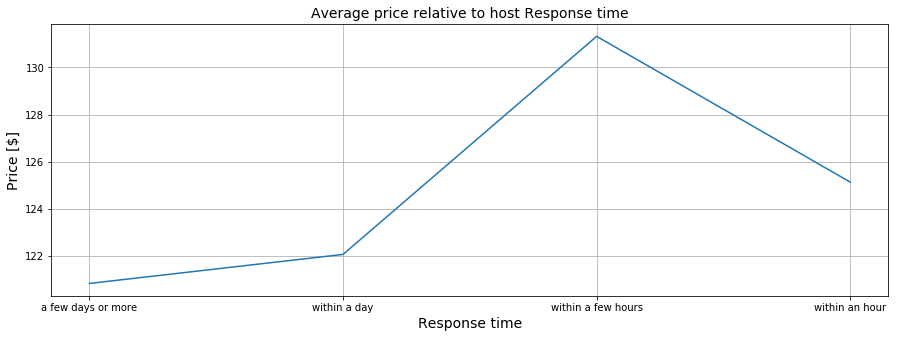

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(listings)
plt.title('Average price relative to host Response time', fontsize=14)
plt.ylabel('Price [$]', fontsize=14)
plt.xlabel('Response time', fontsize=14)
plt.grid(True)

| host_response_time | price | % |
| --- | --- | --- |
| a few days or more | 120.8\$ | 100% |
| within a day | 122.1\$ | 101% |
| within a few hours | 131.3\$ | 109% |
| within an hour | 125.1\$ | 104% |

**В таблице выше показано, что арендодатели, отвечающие на ранние команды, повышают цены на аренду своих домов.**

По сравнению с тем, как домовладельцы берут для ответа несколько дней или больше.:
- на 4% выше арендная плата арендодателей, которые отвечают в течение часа.'
- на 9% выше арендная плата арендодателей, которые отвечают в течение нескольких часов.'




**Перейдем к вопросам 2 и 3:**



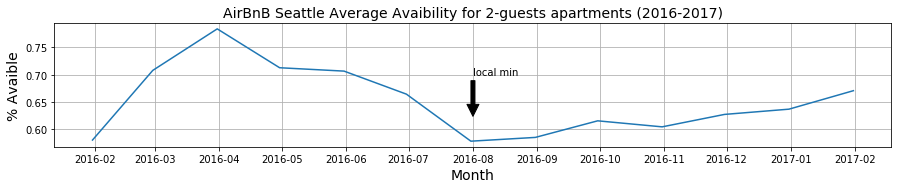

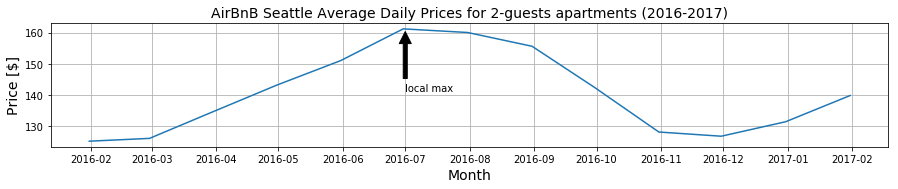

In [8]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(211)
plt.plot(calendar_avaible['available'])
plt.title('AirBnB Seattle Average Avaibility for 2-guests apartments (2016-2017)', fontsize=14)
plt.ylabel('% Avaible', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.grid(True)

months = mdates.MonthLocator()
dfmt = dates.DateFormatter('%Y-%m')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dfmt)

plt.annotate('local min', xy=('2016-08-01', 0.62), xytext=('2016-08-01', 0.7),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.figure(figsize=(15, 5))
ax = plt.subplot(212)
plt.plot(calendar_price['price'])
plt.title('AirBnB Seattle Average Daily Prices for 2-guests apartments (2016-2017)', fontsize=14)
plt.ylabel('Price [$]', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.grid(True)


months = mdates.MonthLocator()
dfmt = dates.DateFormatter('%Y-%m')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dfmt)

plt.annotate('local max', xy=(price_max.index[0]+datetime.timedelta(days=1), price_max.iloc[0][0]), xytext=(price_max.index[0]++datetime.timedelta(days=1), price_max.iloc[0][0]-20.0),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )


plt.show()

На рисунке выше видно, что самым прибыльным временем для арендодателей (и самым дорогим для арендаторов) был июль, за которым последовал август. Напротив, в зимние месяцы средние цены были самыми низкими.